### language words is the core to understand the alphabet patterns. So this notebook will explore all possible word generating patterns in given language.

#### NOTE : this pattern of word can be used as New Language Creation

### English Language

In [3]:
## all the words of english collected from https://github.com/dwyl/english-wordshttps://github.com/dwyl/english-words
## which have around 370K words

In [39]:
import re
import json
import random
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import matplotlib.pyplot as plt

In [2]:
with open("language-words/english_words.json", "r") as fp:
    english_words = json.load(fp)
    
english_words = list(english_words.keys())
print("total words : ", len(english_words))

total words :  370101


In [3]:
## shuffle the corpus words
## random.shuffle(english_words)

In [4]:
## get count of each char in each word list.
count_vectorizer = CountVectorizer(token_pattern=r'\S')
english_words_count_vector = count_vectorizer.fit_transform(english_words)

english_words_count_vector.shape

(370101, 27)

In [5]:
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\S')
english_words_tfidf_vector = tfidf_vectorizer.fit_transform(english_words)

english_words_tfidf_vector.shape

(370101, 27)

Text(0, 0.5, 'word index in the corpus')

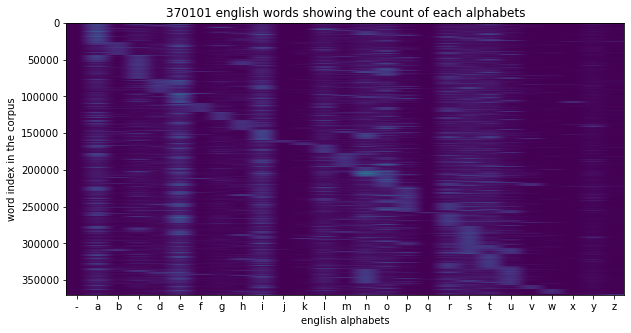

In [31]:
## plotting graph of count-vector on english language
alphabets_ = count_vectorizer.get_feature_names()

fig = plt.figure(figsize=(10,5))
plt.imshow(english_words_count_vector.toarray(), aspect="auto")
plt.xticks(ticks=list(range(len(alphabets_))), labels=alphabets_)

plt.title(f"{english_words_count_vector.shape[0]} english words showing the count of each alphabets")
plt.xlabel("english alphabets")
plt.ylabel("word index in the corpus")

Text(0, 0.5, 'word index in the corpus')

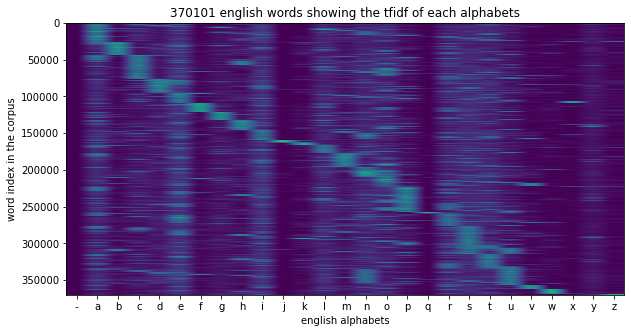

In [19]:
## plotting graph of tfidf-vector on english language
alphabets_ = tfidf_vectorizer.get_feature_names()

fig = plt.figure(figsize=(10,5))
plt.imshow(english_words_tfidf_vector.toarray(), aspect="auto")
plt.xticks(ticks=list(range(len(alphabets_))), labels=alphabets_)

plt.title(f"{english_words_tfidf_vector.shape[0]} english words showing the tfidf of each alphabets")
plt.xlabel("english alphabets")
plt.ylabel("word index in the corpus")

### mapping the all possible words to actual words

In [14]:
## loading the generated all possible words
with open("generated_words/max_words_3-min_words_1.json", "r") as fp:
    all_possible_words = json.load(fp)
    
all_generated_words = []
[all_generated_words.extend(words_info["word_permutation"]) for words_info in all_possible_words]

[None, None, None]

In [26]:
## selecting only the words which are meaningful in given language (english) from the all possible generated words
filtered_words = list(set(all_generated_words).intersection(english_words))

In [18]:
generated_tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\S')
generated_words_tfidf_vector = generated_tfidf_vectorizer.fit_transform(all_generated_words)

generated_words_tfidf_vector.shape

(16276, 26)

Text(0, 0.5, 'word index in the corpus')

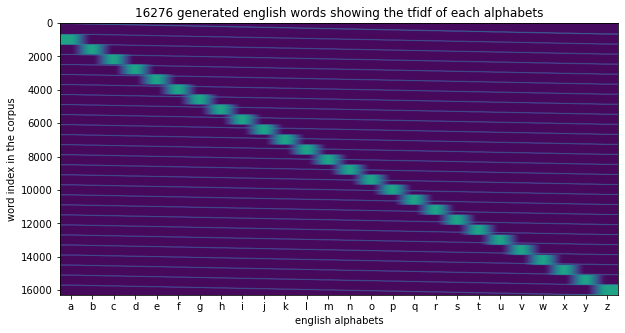

In [20]:
## plotting graph of tfidf-vector on english language
alphabets_ = generated_tfidf_vectorizer.get_feature_names()

fig = plt.figure(figsize=(10,5))
plt.imshow(generated_words_tfidf_vector.toarray(), aspect="auto")
plt.xticks(ticks=list(range(len(alphabets_))), labels=alphabets_)

plt.title(f"{generated_words_tfidf_vector.shape[0]} generated english words showing the tfidf of each alphabets")
plt.xlabel("english alphabets")
plt.ylabel("word index in the corpus")

In [36]:
idx = 40
print(filtered_words[idx])

qty


In [38]:
filtered_words_vector = generated_tfidf_vectorizer.transform(filtered_words)
filtered_words_vector.shape

(2361, 26)

In [74]:
common_vector = np.subtract(generated_words_tfidf_vector.toarray(), filtered_words_vector.toarray())

ValueError: operands could not be broadcast together with shapes (16276,26) (2361,26) 

In [77]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
a = np.array([[4,5,6], [7,8,9]])
print(A.shape, a.shape)

(3, 3) (2, 3)


In [78]:
np.subtract(a,A)

ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

In [73]:
np.where(np.all(np.subtract(A,a) == 0, axis=1))

(array([1], dtype=int64),)